<a href="https://colab.research.google.com/github/ingenziart/sokrab/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#sprit the data
y=df['diagnosis']
x=df.drop(['diagnosis'],axis=1)

In [7]:
#train test sprit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [8]:
#feature scaring
from sklearn.preprocessing import StandardScaler
l1=StandardScaler()
x_train=l1.fit_transform(x_train)
x_test=l1.transform(x_test)

In [12]:
#train test using kneighbor
from sklearn.neighbors import KNeighborsClassifier
k_value=[]
training=[]
testing=[]
score={}

for k in range (1,20):
  clf=KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train,y_train)

  trainingscore=clf.score(x_train,y_train)
  testingscore=clf.score(x_test,y_test)

  k_value.append(k)
  training.append(trainingscore)
  testing.append(testingscore)
  score[k]=[trainingscore,testingscore]

In [14]:
from operator import index

for index,values in score.items():
  print(index, ":", values)

1 : [1.0, 0.9385964912280702]
2 : [0.9758241758241758, 0.9385964912280702]
3 : [0.9846153846153847, 0.9385964912280702]
4 : [0.9824175824175824, 0.9473684210526315]
5 : [0.9824175824175824, 0.9473684210526315]
6 : [0.9758241758241758, 0.956140350877193]
7 : [0.978021978021978, 0.956140350877193]
8 : [0.9758241758241758, 0.956140350877193]
9 : [0.9758241758241758, 0.956140350877193]
10 : [0.9736263736263736, 0.9473684210526315]
11 : [0.9758241758241758, 0.956140350877193]
12 : [0.9758241758241758, 0.956140350877193]
13 : [0.9758241758241758, 0.956140350877193]
14 : [0.9648351648351648, 0.956140350877193]
15 : [0.9692307692307692, 0.956140350877193]
16 : [0.9626373626373627, 0.956140350877193]
17 : [0.9692307692307692, 0.956140350877193]
18 : [0.9582417582417583, 0.956140350877193]
19 : [0.9604395604395605, 0.9473684210526315]


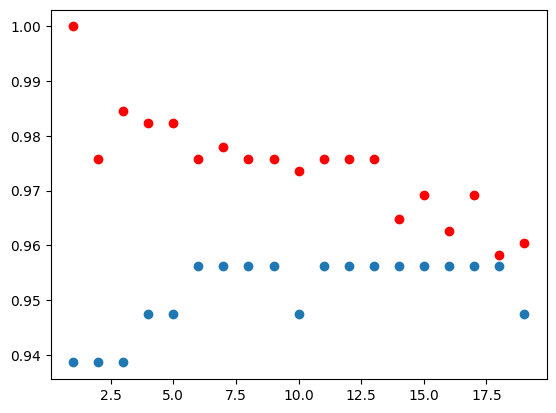

In [19]:
plt.scatter(k_value,training,color='red')
plt.scatter(k_value,testing)
plt.show()